# 추측통계의 기본
- 기술통계와 추측통계 
    - 기술통계 (Descriptive Statistics): 
    > 기술통계는 주어진 데이터를 요약, 표현, 정리하는 방법을 다루는 통계 분야. 기술통계는 데이터의 특성을 이해하고 시각화하여 데이터의 패턴과 중요한 정보를 파악하는 데 중점을 둠. 기술통계는 데이터를 설명하는 다양한 방법을 제공함. 대표적으로 평균, 중앙값, 최빈값, 분산, 표준 편차, 사분위수, 히스토그램, 상자 그림 등을 활용하여 데이터를 요약하고 시각화함. 기술통계는 데이터를 설명하는데 사용되며, 추측통계의 기반이 됨.

    - 추측통계 (Inferential Statistics): 
    > 추측통계는 기술통계와는 달리, 샘플 데이터를 바탕으로 모집단에 대한 결론을 유추하는 방법을 다루는 통계 분야. 모집단은 분석하고자 하는 전체 집단을 의미하며, 일반적으로 모집단을 완전히 조사하는 것이 불가능한 경우가 많음. 따라서 추측통계는 표본 데이터를 사용하여 모집단의 특성을 추론하고 확률적인 결론을 도출함. 추측통계의 기법에는 가설 검정, 신뢰 구간, 회귀 분석 등이 있으며, 이러한 방법들을 통해 샘플 데이터를 바탕으로 모집단에 대한 확률적인 추론을 수행.

- 요약하면, 기술통계는 데이터의 특성을 요약하고 설명하는데 사용되며, 추측통계는 샘플 데이터를 이용하여 모집단에 대한 확률적인 결론을 추론하는데 사용.

## 모집단과 표본 (population, sample)
- 추측통계에서는 관측 대상 전체의 통계적 성질을 그 관측대상의 일부만 사용하여 츠측함
- 모집단 : 추측하고 싶은 관측 대상 전체
- 샘플 : 추측에 사용하는 관측 대상의 일부분
- 표본추출 : 모집단에서 표본을 골라내는 일
- 표본 크기/샘플사이즈 : 표본의 크기
- 표본통계량 : 표본을 바탕으로 계산한 평균, 분산, 상관계수 등
- 모수 : 모집단의 평균이나, 분산, 상관계수 등
- 표본평균 : 표본의 평균, 모집단의 평균: 모평균
- 추정량 : 표본평균은 모평균의 추정량
- 추정값 : 실제로 표본의 데이터를 이용해 계산한 결과 
- 예) A학생은 모평균의 추정량으로 표본평균을 선택하여, 추정값을 70.4점으로 한 것

### 표본의 추출방법
- 무작위추출 (random sampling) : 임의로 표본을 추출하는 방법
- 복원추출 (sampling with replacement) : 여러 차례 동일한 표본을 선택하는 추출 방법
- 비복원추출 (sampling without replacement) : 동일한 표본은 한 번만 선택하는 방법
- np.random.choice(추출 대상이 되는 리스트, 표본 크기)
    - 복원추출이 기본
    - 비복원추출 -> replace = False 
- 난수 시드(seed)
    - 정해두면 매번 동일한 난수를 얻을 수 있음
    - 코드의 재현성을 유지할 수 있음

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [5]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [6]:
np.random.choice([1, 2, 3], 3) #복원추출

array([2, 2, 2])

In [7]:
np.random.choice([1, 2, 3], 3, replace=False) #비복원추출

array([2, 1, 3])

In [8]:
np.random.seed(0) #시드설정
np.random.choice([1, 2, 3], 3) #복원추출

array([1, 2, 1])

In [9]:
np.random.seed(0)
sample = np.random.choice(scores, 20) #복원.무작위추출

sample.mean() #샘플평균

70.4

In [10]:
scores.mean() #모평균

69.53

In [11]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델
- 확률 (probability) : 불확정성을 수반한 현상을 해석하기 위해 확률을 사용
- 확률 모형 (probability model) : 확률을 사용한 무작위추출 혹은 주사위를 모델링한 것
- 모델링 : 현상을 모형처럼 취급하여 특징을 잘 파악하도록 단순화하는 것. 모델링을 실행함으로써 복잡한 현상을 분석할 수 있음

### 확률의 기본
- 확률 변수 (ramdom varibable) : 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
- 시행 (trial) : 확률변수의 결과를 관측하는 것
- 실현값 (realization) : 시행에 의해 관측되는 값
- 사건 (event) : 시행 결과로 나타날 수 있는 일
- 근원사건 (elementary event) : 더 세부적으로 분해할 수 없는 사건
- 상호배반 (mutually exclusive) : 동시에 일어날 수 없는 사건
    - 사건이 서로 배반이라면, 그 중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같다

### 확률분포(probability distribution)
- 확률변수가 어떻게 움직이는지를 나타낸 것 -> 전체 확률이 1인 확률변수가 취할 수 있는 값이 어떻게 분포하고 있는지 나타냄

In [12]:
# 불공정한 주사위
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [13]:
np.random.choice(dice, p=prob)

1

In [14]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [15]:
# 도수분포표
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


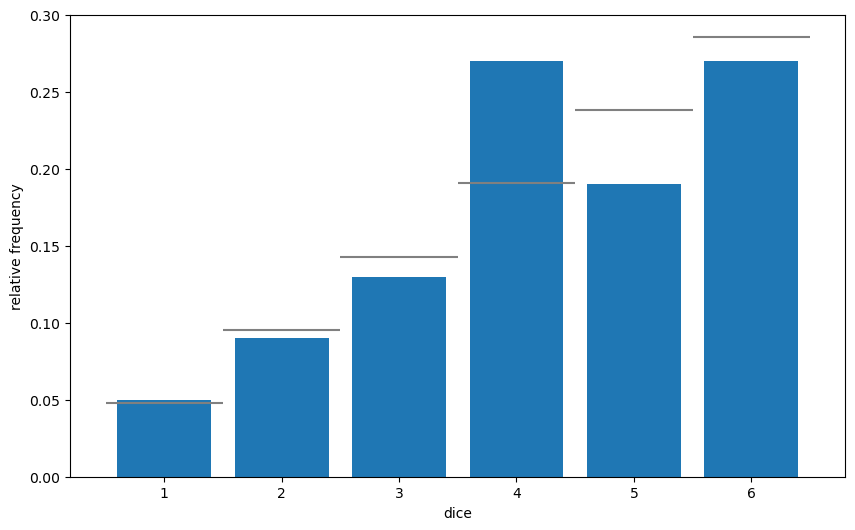

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

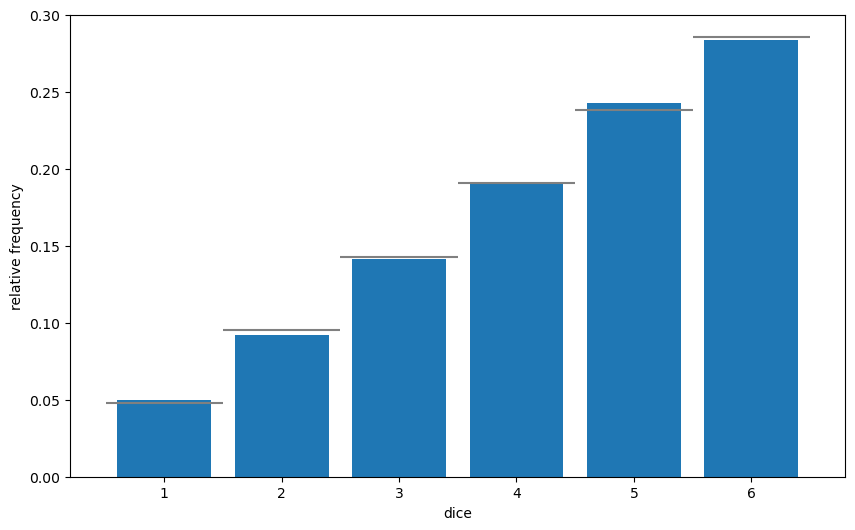

In [17]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

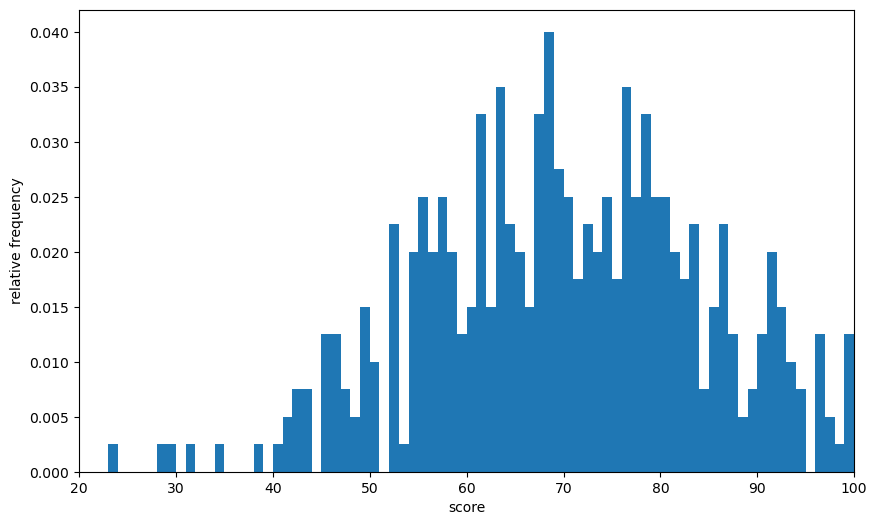

In [18]:
# 전교생 시험 점수
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency') #상대도수
plt.show()

In [19]:
np.random.choice(scores)

89

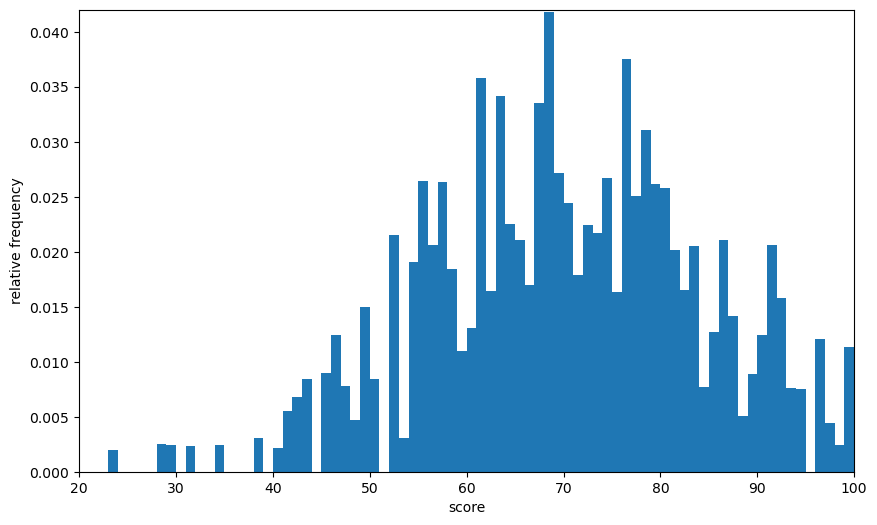

In [20]:
sample = np.random.choice(scores, 10000) #무작위추출로 샘플 사이즈가 10,000인 표본 추출

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

# 표본의 크기가 커지면, 실제의 분포에 수렴됨

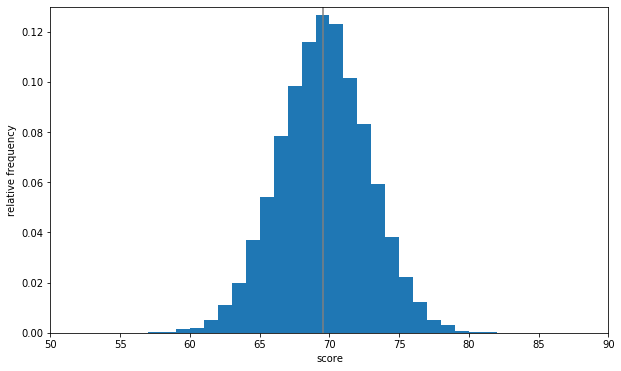

In [22]:
# 표본평균의 분포
sample_means = [np.random.choice(scores, 20).mean() #표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10,000번 수행
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

# 표본평균 -> 산포도. 모평균을 중심으로 분포하고 있음
# 무작위추출에 의한 표본평균으로 모평균을 추정할 수 있는 근거